In [2]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_p_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [3]:
data

['t_n103        35.0882 (32.8078, 40.4977) (32.4149, 39.4771)  7.0622 (Jnode 202)\n',
 't_n104        25.3691 (19.8778, 31.4482) (19.6255, 31.1624) 11.5369 (Jnode 201)\n',
 't_n105        24.2420 (18.9699, 30.0754) (18.7552, 29.8197) 11.0644 (Jnode 200)\n',
 't_n106        21.3998 (16.7142, 26.6110) (16.5381, 26.4067)  9.8686 (Jnode 199)\n',
 't_n107        20.5971 (16.0772, 25.6201) (15.9449, 25.4461)  9.5012 (Jnode 198)\n',
 't_n108        18.9872 (14.8047, 23.6547) (14.6600, 23.4716)  8.8116 (Jnode 197)\n',
 't_n109         9.3239 ( 6.9817, 11.9800) ( 6.9132, 11.8949)  4.9817 (Jnode 196)\n',
 't_n110         9.2179 ( 6.9022, 11.8476) ( 6.8367, 11.7643)  4.9276 (Jnode 195)\n',
 't_n111         8.9220 ( 6.6780, 11.4706) ( 6.6160, 11.3925)  4.7764 (Jnode 194)\n',
 't_n112         8.5203 ( 6.3726, 10.9623) ( 6.2852, 10.8592)  4.5740 (Jnode 193)\n',
 't_n113         8.1388 ( 6.0813, 10.4762) ( 6.0330, 10.4153)  4.3822 (Jnode 192)\n',
 't_n114         5.7261 ( 4.2014,  7.5049) ( 4.1252,  

In [4]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [5]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [6]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [7]:
posterior_mean_iqtree

[35.0882,
 25.3691,
 24.242,
 21.3998,
 20.5971,
 18.9872,
 9.3239,
 9.2179,
 8.922,
 8.5203,
 8.1388,
 5.7261,
 1.726,
 4.1366,
 3.2968,
 6.3615,
 5.2296,
 8.4944,
 8.1152,
 4.5036,
 6.4546,
 5.3629,
 5.6067,
 7.9959,
 7.4064,
 2.2197,
 8.758,
 7.7437,
 5.3631,
 4.8664,
 4.026,
 5.969,
 4.6773,
 3.9681,
 17.9458,
 13.9649,
 19.4115,
 17.4631,
 15.9051,
 12.6407,
 10.8804,
 9.629,
 7.9648,
 13.1166,
 7.0768,
 15.8734,
 14.4337,
 3.6001,
 1.6307,
 22.2919,
 19.5059,
 16.0413,
 12.2378,
 13.3819,
 20.6583,
 17.805,
 18.2331,
 24.4418,
 22.6857,
 19.8938,
 6.8079,
 20.2801,
 18.89,
 16.0268,
 14.013,
 11.0315,
 20.0208,
 12.8859,
 12.1535,
 11.6286,
 10.8841,
 9.7303,
 9.3047,
 8.8282,
 8.2811,
 7.5765,
 6.8635,
 5.9136,
 4.0697,
 7.6404,
 6.7504,
 5.9121,
 8.3364,
 7.4742,
 7.0256,
 5.5707,
 6.1626,
 7.3262,
 6.3206,
 5.2097,
 9.1564,
 7.9116,
 8.6243,
 7.997,
 6.9823,
 4.9261,
 5.2962,
 4.1636,
 1.4966,
 12.5318,
 10.3451]

In [8]:
lower_ci_iqtree

[]

In [9]:
upper_ci_iqtree

[]

In [10]:
file_LG = open("LG_G4_codeml_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [12]:
posterior_mean_baseml

[33.1732,
 22.9994,
 22.0129,
 20.2109,
 19.6199,
 18.6431,
 9.6008,
 9.5458,
 9.3226,
 8.8859,
 8.5118,
 6.4733,
 1.6172,
 4.5062,
 3.2041,
 6.4068,
 5.526,
 8.8673,
 8.5074,
 4.3723,
 6.6411,
 5.4224,
 5.6703,
 8.278,
 7.7225,
 2.4412,
 8.9351,
 8.048,
 5.2796,
 4.6872,
 3.7052,
 6.3568,
 5.0,
 3.2574,
 17.4118,
 14.9622,
 18.5765,
 17.0083,
 15.7519,
 13.0316,
 11.2573,
 10.0044,
 8.3812,
 13.2775,
 7.9415,
 15.8235,
 14.3494,
 3.8871,
 1.7332,
 20.2899,
 18.061,
 15.4237,
 12.2879,
 12.7547,
 19.0692,
 16.8476,
 17.3205,
 22.263,
 20.8546,
 18.31,
 8.1581,
 18.8308,
 17.4636,
 15.3298,
 13.3053,
 11.7456,
 18.9626,
 13.7329,
 13.0293,
 12.5549,
 12.2658,
 11.1072,
 10.6131,
 10.2413,
 9.6208,
 8.8919,
 8.1433,
 7.057,
 5.1038,
 8.8195,
 8.093,
 7.3218,
 9.7992,
 8.8155,
 8.2416,
 6.7645,
 7.4167,
 8.7011,
 7.6467,
 6.3098,
 10.5117,
 9.2254,
 9.9513,
 9.1296,
 8.1069,
 5.904,
 6.1409,
 3.8337,
 1.4031,
 12.9302,
 11.2771]

In [13]:
posterior_mean_iqtree

[35.0882,
 25.3691,
 24.242,
 21.3998,
 20.5971,
 18.9872,
 9.3239,
 9.2179,
 8.922,
 8.5203,
 8.1388,
 5.7261,
 1.726,
 4.1366,
 3.2968,
 6.3615,
 5.2296,
 8.4944,
 8.1152,
 4.5036,
 6.4546,
 5.3629,
 5.6067,
 7.9959,
 7.4064,
 2.2197,
 8.758,
 7.7437,
 5.3631,
 4.8664,
 4.026,
 5.969,
 4.6773,
 3.9681,
 17.9458,
 13.9649,
 19.4115,
 17.4631,
 15.9051,
 12.6407,
 10.8804,
 9.629,
 7.9648,
 13.1166,
 7.0768,
 15.8734,
 14.4337,
 3.6001,
 1.6307,
 22.2919,
 19.5059,
 16.0413,
 12.2378,
 13.3819,
 20.6583,
 17.805,
 18.2331,
 24.4418,
 22.6857,
 19.8938,
 6.8079,
 20.2801,
 18.89,
 16.0268,
 14.013,
 11.0315,
 20.0208,
 12.8859,
 12.1535,
 11.6286,
 10.8841,
 9.7303,
 9.3047,
 8.8282,
 8.2811,
 7.5765,
 6.8635,
 5.9136,
 4.0697,
 7.6404,
 6.7504,
 5.9121,
 8.3364,
 7.4742,
 7.0256,
 5.5707,
 6.1626,
 7.3262,
 6.3206,
 5.2097,
 9.1564,
 7.9116,
 8.6243,
 7.997,
 6.9823,
 4.9261,
 5.2962,
 4.1636,
 1.4966,
 12.5318,
 10.3451]

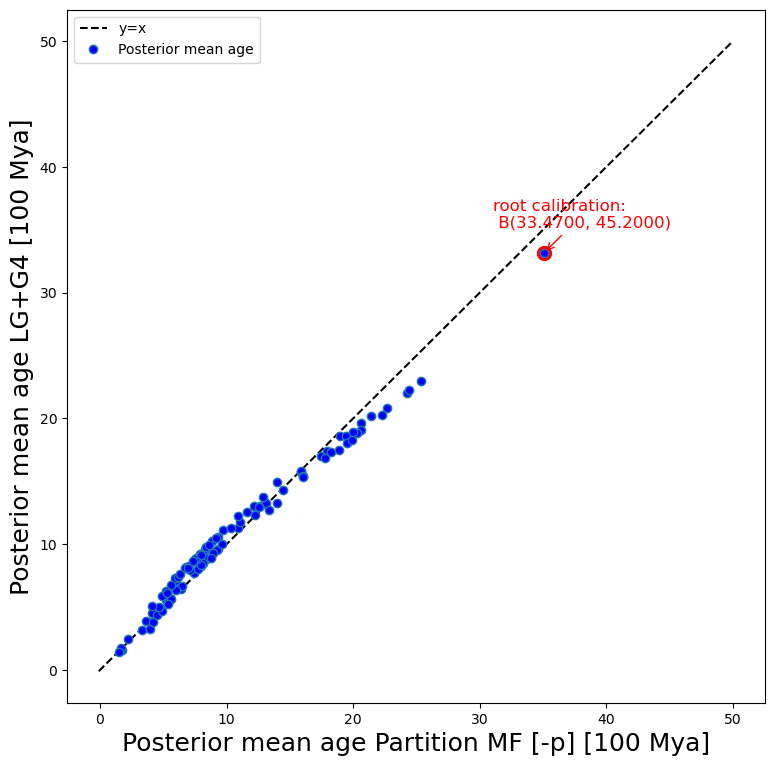

In [14]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
# ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

# points[0].set_edgecolor('red')  # Change edge color if needed
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[23], posterior_mean_baseml[23], color='red', s=100)
ax.annotate('root calibration:\n B(33.4700, 45.2000)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -4,  posterior_mean_baseml[0] + 2),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# ax.annotate('young calibration:\n B (5.2500, 18.9100)', 
#         xy=(posterior_mean_iqtree[23], posterior_mean_baseml[23]), 
#         xytext=(posterior_mean_iqtree[23] -6,  posterior_mean_baseml[23] + 10),  # Offset position for the label
#         arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
#         fontsize=12, color='red') 
# Labels and title
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-p] [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG+G4 and Partition MF [-p] [t103 ~ B(33.4700, 45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_p_root_scatter.png')

In [15]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')